<a href="https://colab.research.google.com/gist/qbeer/545fa2d88e7541f81a137f6d0363e6c9/hw7_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.) Linear SVC in case of linear separation

* load the Iris dataset (can be found in sklearn API)
* scale the data and plot the petal length vs petal width in a scatterplot colored with the target
* train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
* visualize the model's decision boundary and the margins based on the coefficients learnt by the model
* interpret the results, what is the role of the C hyperparameter?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.svm import SVC
from sklearn.datasets import *
from collections import Counter
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

#standard scaler
from sklearn.preprocessing import StandardScaler as StandardScaler


### 1/a Loading the dataset

In [2]:
iris_data = load_iris()
iris_dataset = iris_data.data
iris_dataset = pd.DataFrame(iris_dataset, columns=["sepal length","sepal width","petal length","petal width"])
iris_target = pd.DataFrame(iris_data.target, columns=["Cat"])

print(len(iris_data.data), len(iris_dataset))
print(iris_data.target)
print(iris_dataset[0:10])
print(iris_target[0:10])

150 150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1
   Cat
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0


In [3]:
print("""'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n    :Missing Attribute Values: None\n    :Class Distribution: 33.3% for each of 3 classes.\n    :Creator: R.A. Fisher\n    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)\n    :Date: July, 1988\n\nThe famous Iris database, first used by Sir R.A. Fisher. The dataset is taken\nfrom Fisher\'s paper. Note that it\'s the same as in R, but not as in the UCI\nMachine Learning Repository, which has two wrong data points.\n\nThis is perhaps the best known database to be found in the\npattern recognition literature.  Fisher\'s paper is a classic in the field and\nis referenced frequently to this day.  (See Duda & Hart, for example.)  The\ndata set contains 3 classes of 50 instances each, where each class refers to a\ntype of iris plant.  One class is linearly separable from the other 2; the\nlatter are NOT linearly separable from each other.\n\n.. topic:: References\n\n   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"\n     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to\n     Mathematical Statistics" (John Wiley, NY, 1950).\n   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.\n     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.\n   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System\n     Structure and Classification Rule for Recognition in Partially Exposed\n     Environments".  IEEE Transactions on Pattern Analysis and Machine\n     Intelligence, Vol. PAMI-2, No. 1, 67-71.\n   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions\n     on Information Theory, May 1972, 431-433.\n   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II\n     conceptual clustering system finds 3 classes in the data.\n   - Many, many more ...', 'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 'filename': 'E:\\ANACONDA\\conda\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'}""")

'DESCR': '.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== =

### 1/b scaling the data

In [4]:
scaler = StandardScaler()

In [5]:
iris_dataset = pd.DataFrame(StandardScaler().fit_transform(iris_dataset), index=iris_dataset.index, columns=iris_dataset.columns)
print(iris_dataset[0:10])
print("\nMean of petal width: {0} \nVariance of petal width: {1}".format(np.mean(iris_dataset["petal width"]), np.var(iris_dataset["petal width"]) ))

   sepal length  sepal width  petal length  petal width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444
5     -0.537178     1.939791     -1.169714    -1.052180
6     -1.506521     0.788808     -1.340227    -1.183812
7     -1.021849     0.788808     -1.283389    -1.315444
8     -1.748856    -0.362176     -1.340227    -1.315444
9     -1.143017     0.098217     -1.283389    -1.447076

Mean of petal width: -1.4092430925908654e-15 
Variance of petal width: 1.0


Seems to be a correct normalisation

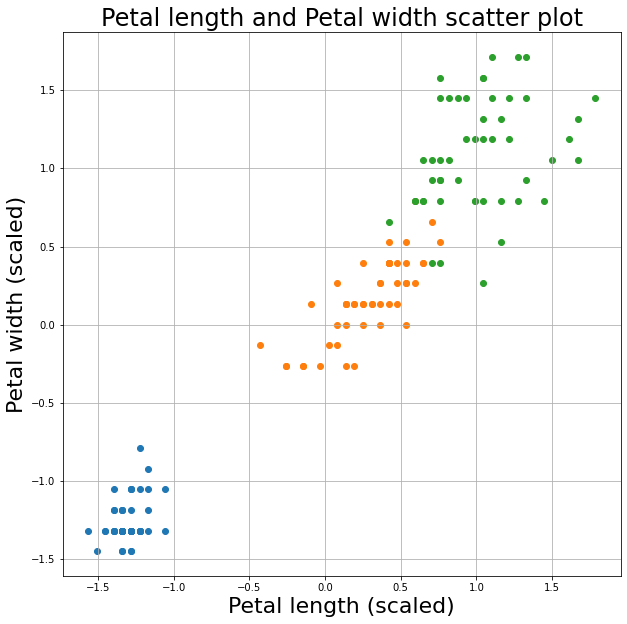

In [6]:
#petal length, petal width
plt.figure(figsize=(10,10))
plt.title("Petal length and Petal width scatter plot", fontsize=24)

#hex colors
colors = [" ", " ", " "]

for i in range(3):
    plt.scatter(iris_dataset["petal length"][iris_target["Cat"]==i], iris_dataset["petal width"][iris_target["Cat"]==i])
    
plt.xlabel("Petal length (scaled)", fontsize=22)
plt.ylabel("Petal width (scaled)", fontsize=22)
plt.grid()
plt.show()

### 1/c SVC training

In [7]:
irisSVM_1 = SVC(C = 1.0, kernel='linear', random_state=123)
irisSVM_1000 = SVC(C = 1000.0, kernel='linear', random_state=123)

iris_1_fit = irisSVM_1.fit(iris_dataset[["petal length", "petal width"]].values, iris_target["Cat"])
iris_1000_fit = irisSVM_1000.fit(iris_dataset[["petal length", "petal width"]].values, iris_target["Cat"])

### 1/d visualize results of SVC train

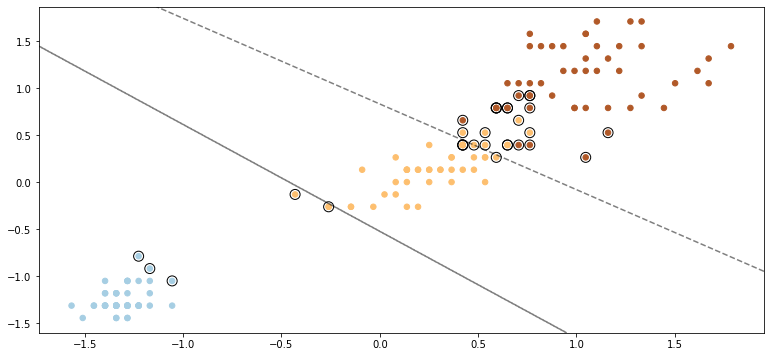

In [8]:
plt.figure(figsize=(13,6))
#plot
plt.scatter(iris_dataset.values[:, 2], iris_dataset.values[:, 3], c=iris_target["Cat"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 1000)
yy = np.linspace(ylim[0], ylim[1], 1000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = iris_1_fit.decision_function(xy)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z[:,2].reshape(XX.shape), colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# plot support vectors
ax.scatter(
    iris_1_fit.support_vectors_[:, 0],
    iris_1_fit.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

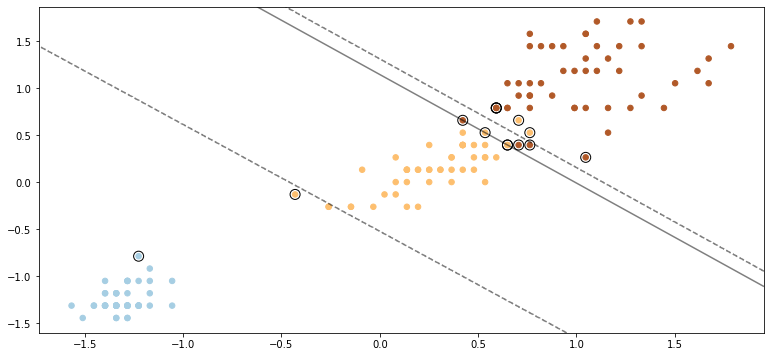

In [9]:

plt.figure(figsize=(13,6))
#plot
plt.scatter(iris_dataset.values[:, 2], iris_dataset.values[:, 3], c=iris_target["Cat"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 1000)
yy = np.linspace(ylim[0], ylim[1], 1000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = iris_1000_fit.decision_function(xy)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z[:,2].reshape(XX.shape), colors="k", levels=[0, 1, 2], alpha=0.5, linestyles=["--", "-", "--"]
)


# plot support vectors
ax.scatter(
    iris_1000_fit.support_vectors_[:, 0],
    iris_1000_fit.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### 1/e Explanation

Personally, I feel like that the C parameter is for fine tuning how much penalty should given for a wrongly separated values. With high C values, it was strict about the hyperplane. With C=1 one, a lot of points got separated badly, while with C=1000, they are better separated with the linear kernel. Obviously, a better kernel would separate more with a more appropriate kernel.

## 2.) Linear SVC but non-linear separation

* create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
* perform the same steps just as in the previous exercise and use the linear kernel for the SVC
* since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
* write down with your own words in few sentences how the support vector machine works



### 2/a Creating dataset

In [10]:
X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
X = pd.DataFrame(X, columns=["X1", "X2"])
y = pd.DataFrame(y, columns=['target'])

In [11]:
len(np.unique(y))

2

### 2/b Same steps as before

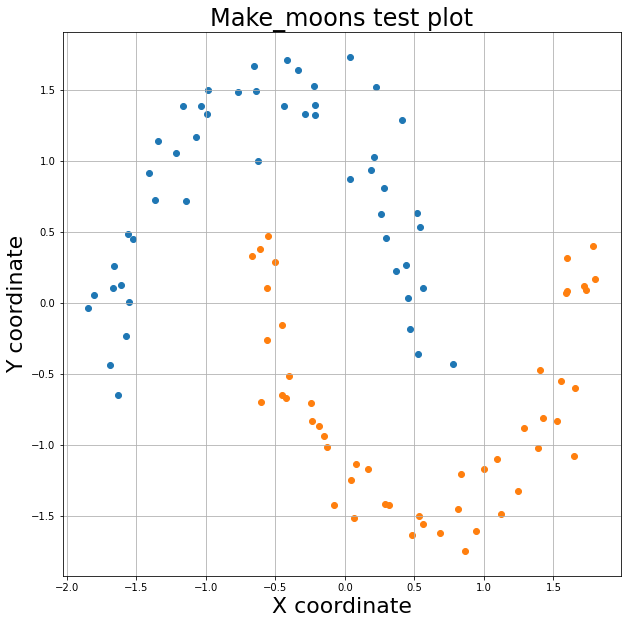

In [12]:
#scaling
X = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)

#test plot
#petal length, petal width
plt.figure(figsize=(10,10))
plt.title("Make_moons test plot", fontsize=24)

#hex colors
colors = [" ", " ", " "]

for i in range(len(y)):
    plt.scatter(X["X1"][y['target']==i],X["X2"][y['target']==i])
    
plt.xlabel("X coordinate", fontsize=22)
plt.ylabel("Y coordinate", fontsize=22)
plt.grid()
plt.show()

In [13]:
mmSVM_1 = SVC(C = 1.0, kernel='linear', random_state=123)
mmSVM_1000 = SVC(C = 1000.0, kernel='linear', random_state=123)

mm_1_fit = mmSVM_1.fit(X[["X1", "X2"]].values, y['target'])
mm_1000_fit = mmSVM_1000.fit(X[["X1", "X2"]].values, y['target'])

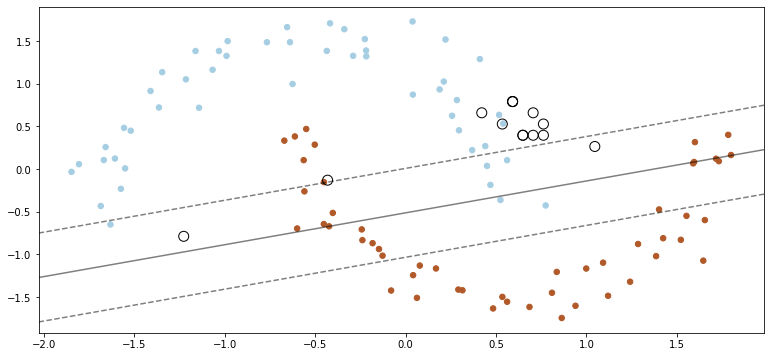

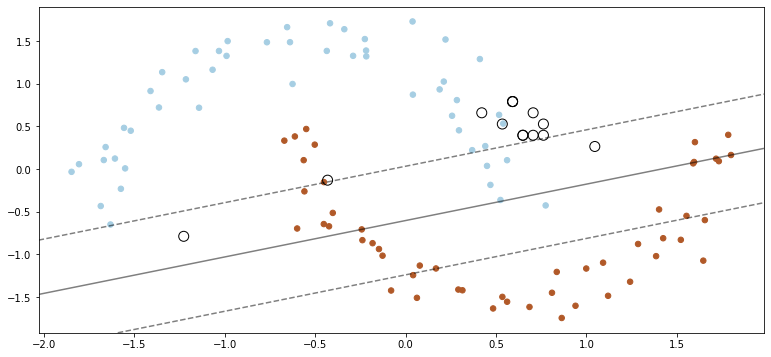

In [14]:
plt.figure(figsize=(13,6))
#plot
plt.scatter(X["X1"], X["X2"], c=y["target"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mm_1000_fit.decision_function(xy)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z.reshape(XX.shape), colors="k", levels=[0, 1, 2], alpha=0.5, linestyles=["--", "-", "--"]
)


# plot support vectors
ax.scatter(
    iris_1000_fit.support_vectors_[:, 0],
    iris_1000_fit.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

plt.figure(figsize=(13,6))
#plot
plt.scatter(X["X1"], X["X2"], c=y["target"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mm_1_fit.decision_function(xy)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z.reshape(XX.shape), colors="k", levels=[0, 1, 2], alpha=0.5, linestyles=["--", "-", "--"]
)


# plot support vectors
ax.scatter(
    iris_1000_fit.support_vectors_[:, 0],
    iris_1000_fit.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [15]:
mmSVM_1_3rd_poly = SVC(kernel='poly',C = 1.0, random_state=123,degree=3)
mmSVM_1000_3rd_poly = SVC( kernel='poly',C = 1000.0, random_state=123, degree=3)

mm_1_fit_3rd_poly = mmSVM_1_3rd_poly .fit(X[["X1", "X2"]].values, y['target'])
mm_1000_fit_3_poly = mmSVM_1000_3rd_poly .fit(X[["X1", "X2"]].values, y['target'])

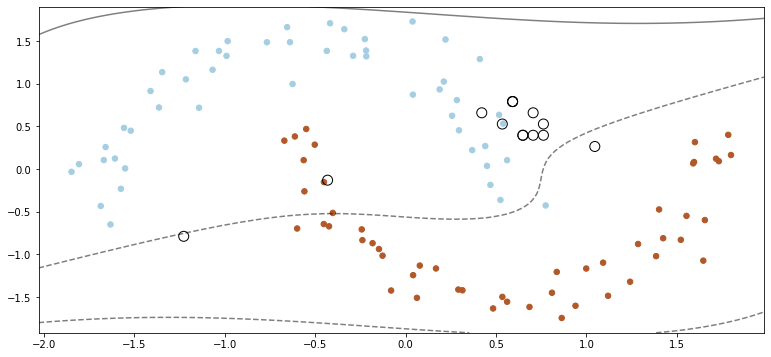

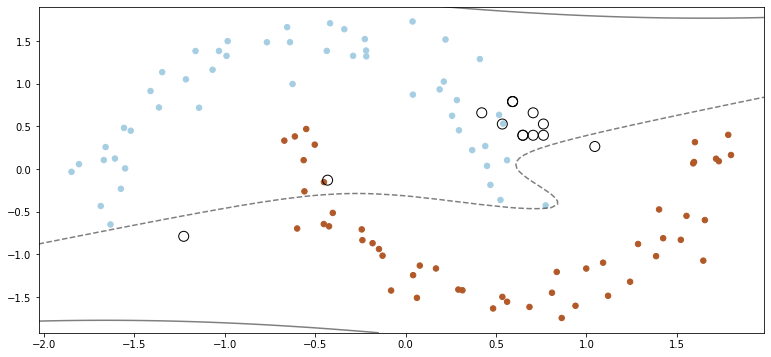

In [16]:
plt.figure(figsize=(13,6))
#plot
plt.scatter(X["X1"], X["X2"], c=y["target"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mm_1_fit_3rd_poly .decision_function(xy)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z.reshape(XX.shape), colors="k", levels=2, alpha=0.5, linestyles=["--", "-", "--"]
)


# plot support vectors
ax.scatter(
    iris_1000_fit.support_vectors_[:, 0],
    iris_1000_fit.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

plt.figure(figsize=(13,6))
#plot
plt.scatter(X["X1"], X["X2"], c=y["target"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = mm_1000_fit_3_poly.decision_function(xy)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z.reshape(XX.shape), colors="k", levels=2, alpha=0.5, linestyles=["--", "-"]
)


# plot support vectors
ax.scatter(
    iris_1000_fit.support_vectors_[:, 0],
    iris_1000_fit.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

It kind of has the same form but something makes look bad. It still peforms better than the linear kernel,but something is very off with this.

## 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:

* you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels

* train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)

* generate prediction for the samples that were not used during the training

To-do now:

* build default SVC, but set it to predict probabilities
* plot the ROC curve and calculate the confusion matrix for the predictions
* do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
*how good is the performance of the new model?

In [17]:
import regex as re

### Load, format, do SVC classifing

In [18]:
#load
data0 = pd.read_excel('data/aar3247_cohen_sm_tables-s1-s11.xlsx', sheet_name='Table S6', skiprows=2)
data0 = data0[:-4].replace(to_replace=r'[\*]', value='', regex=True)

display(data0.head())


#convert
for column in data0.columns[4:-1]:
    data0[column] = pd.to_numeric(data0[column])

#extract values
tumor_type = data0['Tumor type']
cancerSEEK_res = data0[['CancerSEEK Logistic Regression Score','CancerSEEK Test Result']]


#check
print(np.unique(tumor_type))
print(cancerSEEK_res[0:5])

#drop columns
data0 = data0.drop(columns = ['Patient ID #',
                              'Sample ID #',
                              'Tumor type',
                              'AJCC Stage',
                              'CancerSEEK Logistic Regression Score',
                              'CancerSEEK Test Result'])

#dropna - reset index
data0 = data0.dropna()
tumor_type = tumor_type[data0.index]
print(data0.info())


tumor_type_coded = tumor_type.replace(['Normal','Colorectum','Breast','Lung', 'Pancreas', 'Stomach', 'Ovary', 'Esophagus', 'Liver'], 
                                [0,1,1,1,1,1,1,1,1])
print(np.unique(tumor_type_coded))


#TRAAAAAIIINN IIITTT
X_ = data0                #X
Y_ = tumor_type_coded     #target Y

X_train_2 = X_[1::2]
X_test_2 = X_[::2]

Y_train_2 = Y_[1::2]
Y_test_2 = Y_[::2]

#fit
cancerSVC = SVC(C=100, probability=True).fit(X_train_2.values,Y_train_2.values)
cancerPredict = cancerSVC.predict(X_test_2.values)

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,16.452,...,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,715.308,20936.35,2772.96,7.27,10.04,40.91,...,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,4.854,16.96,16.452,...,204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,715.308,1604.34,2029.96,5.39,8.31,16.452,...,204.792,29.47,5856,6121.93,16.086,4331.02,20441.19,25896.73,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,4.854,11.73,16.452,...,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434,Negative


['Breast' 'Colorectum' 'Esophagus' 'Liver' 'Lung' 'Normal' 'Ovary'
 'Pancreas' 'Stomach']
   CancerSEEK Logistic Regression Score CancerSEEK Test Result
0                              0.938342               Positive
1                              0.925363               Positive
2                              0.852367               Negative
3                              0.617639               Negative
4                              0.318434               Negative
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 1816
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AFP (pg/ml)                  1803 non-null   float64
 1   Angiopoietin-2 (pg/ml)       1803 non-null   float64
 2   AXL (pg/ml)                  1803 non-null   float64
 3   CA-125 (U/ml)                1803 non-null   float64
 4   CA 15-3 (U/ml)               1803 non-null   float64
 5   CA19-9 (U/ml) 

### ROC Curve


In [19]:
from sklearn import metrics
from sklearn.metrics import roc_curve as roc_curve

In [20]:
fpr_h, tpr_h, thresholds_h = roc_curve(Y_test_2.values,
                                 cancerPredict)
fpr_s, tpr_s, thresholds_s = roc_curve(Y_test_2.values,
                                 cancerSVC.decision_function(X_test_2))

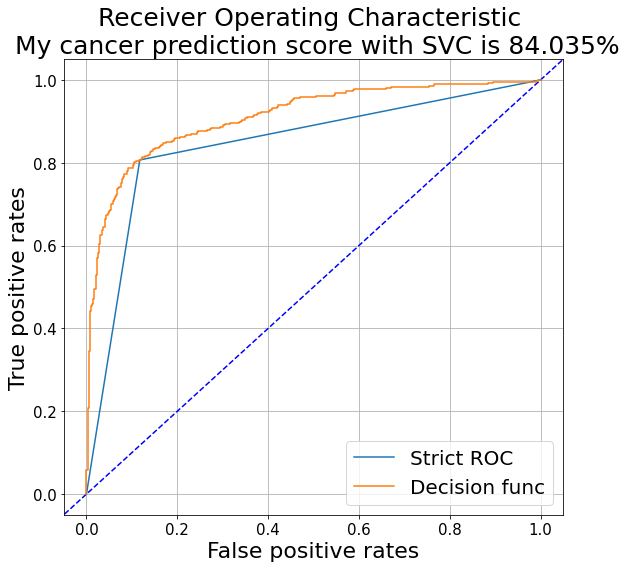

In [21]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot([-0.1,1.1], [-0.1,1.1], "--b")
ax.plot(fpr_h,tpr_h, label="Strict ROC")
ax.plot(fpr_s,tpr_s, label="Decision func")

ax.set_title("Receiver Operating Characteristic \n My cancer prediction score with SVC is {0:.3f}%".format(cancerSVC .score(X_test_2, Y_test_2)*100), fontsize=25)
ax.set_xlabel("False positive rates", fontsize=22)
ax.set_ylabel("True positive rates", fontsize=22)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.legend(loc="best", fontsize=20)
ax.grid()
ax.tick_params(axis="both", labelsize=15)

fig.tight_layout()

plt.show()

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

array([[353,  47],
       [ 97, 405]], dtype=int64)

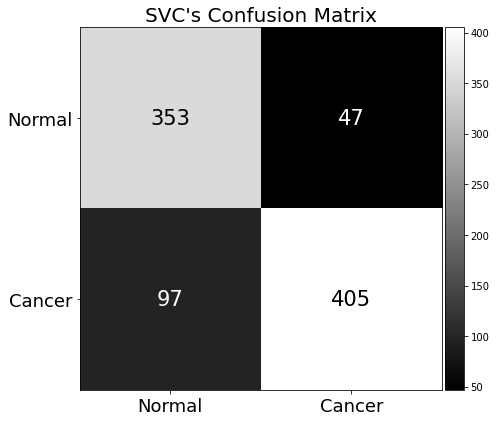

In [23]:
C_MY = metrics.confusion_matrix(Y_test_2, cancerPredict)
display(C_MY)

fig,ax = plt.subplots(1,1,figsize=(7,7))




ax.set_xticks(np.arange(0,len(C_MY[0,:])))            #class ticks place
ax.set_yticks(np.arange(0,len(C_MY[:,0])))            #survived ticks place
ax_x = ["Normal", "Cancer"]                           #class tick labels
ax_y = ["Normal", "Cancer"]                           #survived tick labels
ax.set_xticklabels(ax_x, fontsize=18)
ax.set_yticklabels(ax_y, fontsize=18)

    
ax.set_title("SVC's Confusion Matrix", fontsize=20)
im1 = ax.imshow(C_MY, cmap="gray")

for i in range(0,len(C_MY)):
    for j in range(0,2):
        color0="black"
        if(int(round(C_MY[i,j])) < int(round(np.max(C_MY)))*0.7):
            color0 = "white"
        text = ax.text(j, i, str(C_MY[i, j]),
                       ha="center", va="center", color=color0, fontsize=21)    

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')        

fig.tight_layout()

plt.show()

As far I can tell this already peforms better then the linear regression from last time.

## 4.) Scale data and try different kernels

* scale your data before applying the SVC model
* plot the ROC curve and calculate the confusion matrix for the predictions
* does your model perform better or worse after scaling?
* try out other kernels (linear, poly) and evaluate the performance of the model the same way

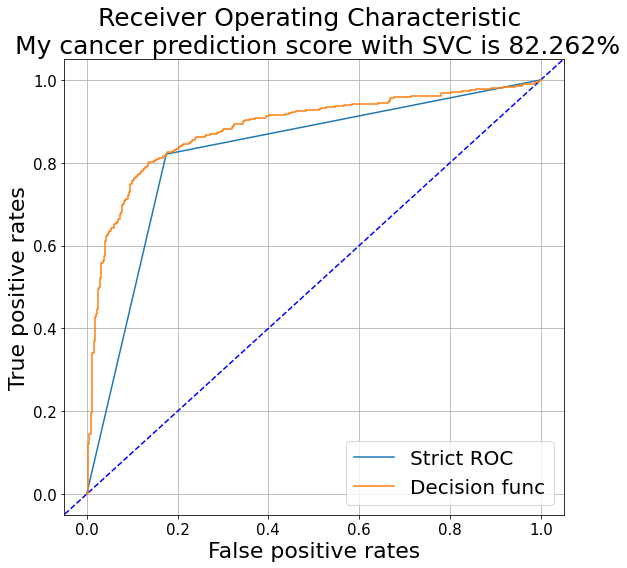

array([[330,  70],
       [ 90, 412]], dtype=int64)

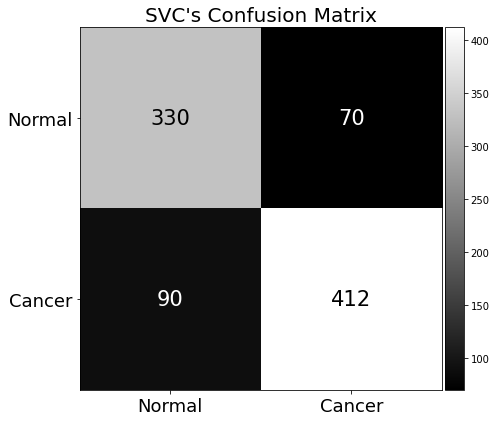

In [24]:
#scale data -> they already knew I will forget it....
data0_scaled = pd.DataFrame(StandardScaler().fit_transform(data0), index=data0.index, columns=data0.columns)

#fit
cancerSVC = SVC(C=10000, probability=True).fit(X_train_2.values,Y_train_2.values)
cancerPredict = cancerSVC.predict(X_test_2.values)

fpr_h, tpr_h, thresholds_h = roc_curve(Y_test_2.values,
                                 cancerPredict)
fpr_s, tpr_s, thresholds_s = roc_curve(Y_test_2.values,
                                 cancerSVC.decision_function(X_test_2))

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot([-0.1,1.1], [-0.1,1.1], "--b")
ax.plot(fpr_h,tpr_h, label="Strict ROC")
ax.plot(fpr_s,tpr_s, label="Decision func")

ax.set_title("Receiver Operating Characteristic \n My cancer prediction score with SVC is {0:.3f}%".format(cancerSVC .score(X_test_2, Y_test_2)*100), fontsize=25)
ax.set_xlabel("False positive rates", fontsize=22)
ax.set_ylabel("True positive rates", fontsize=22)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.legend(loc="best", fontsize=20)
ax.grid()
ax.tick_params(axis="both", labelsize=15)

fig.tight_layout()

plt.show()

C_MY = metrics.confusion_matrix(Y_test_2, cancerPredict)
display(C_MY)

fig,ax = plt.subplots(1,1,figsize=(7,7))




ax.set_xticks(np.arange(0,len(C_MY[0,:])))            #class ticks place
ax.set_yticks(np.arange(0,len(C_MY[:,0])))            #survived ticks place
ax_x = ["Normal", "Cancer"]                           #class tick labels
ax_y = ["Normal", "Cancer"]                           #survived tick labels
ax.set_xticklabels(ax_x, fontsize=18)
ax.set_yticklabels(ax_y, fontsize=18)

    
ax.set_title("SVC's Confusion Matrix", fontsize=20)
im1 = ax.imshow(C_MY, cmap="gray")

for i in range(0,len(C_MY)):
    for j in range(0,2):
        color0="black"
        if(int(round(C_MY[i,j])) < int(round(np.max(C_MY)))*0.7):
            color0 = "white"
        text = ax.text(j, i, str(C_MY[i, j]),
                       ha="center", va="center", color=color0, fontsize=21)    

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')        

fig.tight_layout()

plt.show()

It performs a little bit worse... maybe due to random state at start?

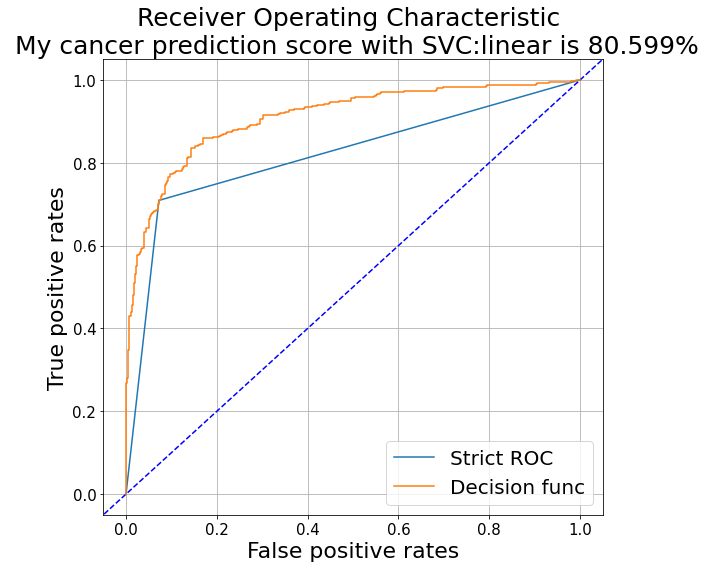

array([[371,  29],
       [146, 356]], dtype=int64)

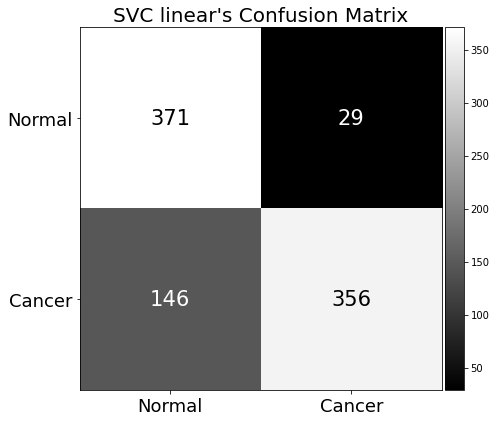

In [25]:
#fit
cancerSVC = SVC(C=10,kernel='poly',probability=True).fit(X_train_2.values,Y_train_2.values)
cancerPredict = cancerSVC.predict(X_test_2.values)

fpr_h, tpr_h, thresholds_h = roc_curve(Y_test_2.values,
                                 cancerPredict)
fpr_s, tpr_s, thresholds_s = roc_curve(Y_test_2.values,
                                 cancerSVC.decision_function(X_test_2))

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot([-0.1,1.1], [-0.1,1.1], "--b")
ax.plot(fpr_h,tpr_h, label="Strict ROC")
ax.plot(fpr_s,tpr_s, label="Decision func")

ax.set_title("Receiver Operating Characteristic \n My cancer prediction score with SVC:linear is {0:.3f}%".format(cancerSVC .score(X_test_2, Y_test_2)*100), fontsize=25)
ax.set_xlabel("False positive rates", fontsize=22)
ax.set_ylabel("True positive rates", fontsize=22)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.legend(loc="best", fontsize=20)
ax.grid()
ax.tick_params(axis="both", labelsize=15)

fig.tight_layout()

plt.show()

C_MY = metrics.confusion_matrix(Y_test_2, cancerPredict)
display(C_MY)

fig,ax = plt.subplots(1,1,figsize=(7,7))




ax.set_xticks(np.arange(0,len(C_MY[0,:])))            #class ticks place
ax.set_yticks(np.arange(0,len(C_MY[:,0])))            #survived ticks place
ax_x = ["Normal", "Cancer"]                           #class tick labels
ax_y = ["Normal", "Cancer"]                           #survived tick labels
ax.set_xticklabels(ax_x, fontsize=18)
ax.set_yticklabels(ax_y, fontsize=18)

    
ax.set_title("SVC linear's Confusion Matrix", fontsize=20)
im1 = ax.imshow(C_MY, cmap="gray")

for i in range(0,len(C_MY)):
    for j in range(0,2):
        color0="black"
        if(int(round(C_MY[i,j])) < int(round(np.max(C_MY)))*0.7):
            color0 = "white"
        text = ax.text(j, i, str(C_MY[i, j]),
                       ha="center", va="center", color=color0, fontsize=21)    

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')        

fig.tight_layout()

plt.show()

NOTE: linear for me dies. Poly 3rd degree goes well and performs well too!

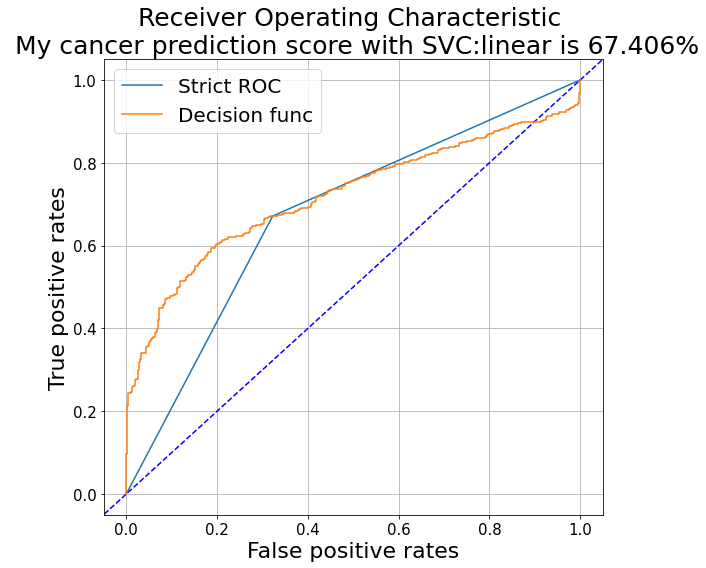

array([[271, 129],
       [165, 337]], dtype=int64)

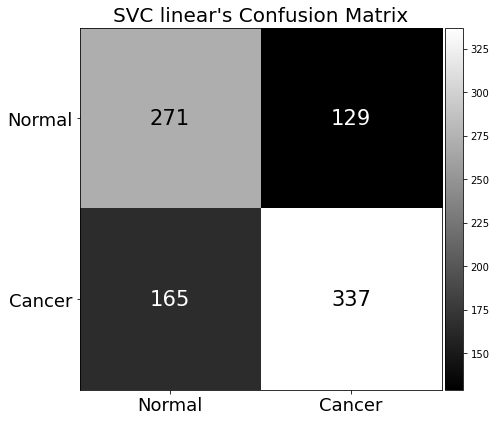

In [26]:
#fit
cancerSVC = SVC(C=10,kernel='sigmoid',probability=True).fit(X_train_2.values,Y_train_2.values)
cancerPredict = cancerSVC.predict(X_test_2.values)

fpr_h, tpr_h, thresholds_h = roc_curve(Y_test_2.values,
                                 cancerPredict)
fpr_s, tpr_s, thresholds_s = roc_curve(Y_test_2.values,
                                 cancerSVC.decision_function(X_test_2))

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot([-0.1,1.1], [-0.1,1.1], "--b")
ax.plot(fpr_h,tpr_h, label="Strict ROC")
ax.plot(fpr_s,tpr_s, label="Decision func")

ax.set_title("Receiver Operating Characteristic \n My cancer prediction score with SVC:linear is {0:.3f}%".format(cancerSVC .score(X_test_2, Y_test_2)*100), fontsize=25)
ax.set_xlabel("False positive rates", fontsize=22)
ax.set_ylabel("True positive rates", fontsize=22)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

ax.legend(loc="best", fontsize=20)
ax.grid()
ax.tick_params(axis="both", labelsize=15)

fig.tight_layout()

plt.show()

C_MY = metrics.confusion_matrix(Y_test_2, cancerPredict)
display(C_MY)

fig,ax = plt.subplots(1,1,figsize=(7,7))




ax.set_xticks(np.arange(0,len(C_MY[0,:])))            #class ticks place
ax.set_yticks(np.arange(0,len(C_MY[:,0])))            #survived ticks place
ax_x = ["Normal", "Cancer"]                           #class tick labels
ax_y = ["Normal", "Cancer"]                           #survived tick labels
ax.set_xticklabels(ax_x, fontsize=18)
ax.set_yticklabels(ax_y, fontsize=18)

    
ax.set_title("SVC linear's Confusion Matrix", fontsize=20)
im1 = ax.imshow(C_MY, cmap="gray")

for i in range(0,len(C_MY)):
    for j in range(0,2):
        color0="black"
        if(int(round(C_MY[i,j])) < int(round(np.max(C_MY)))*0.7):
            color0 = "white"
        text = ax.text(j, i, str(C_MY[i, j]),
                       ha="center", va="center", color=color0, fontsize=21)    

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')        

fig.tight_layout()

plt.show()

## 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

$\textbf{OKEY, BUT WHICH ONE?}$ - Me idiot, the CancerSEEK stuff...

* prepare data as described in the title, then scale all inputs based on the training set
* select your best performing SVC model from the previous exercise
* check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
* create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
* select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)

In [32]:
#https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split

#the problem with sklearn's train test split is that the i could make it in 2 splits, but that may mean some hidden bias
#f*ck it says the same, I am gonna do that than

In [33]:
#rem for remainer
X_train, X_rem, Y_train, Y_rem = train_test_split(data0,tumor_type, train_size=0.7)
#split validation and test
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(1262, 39)
(1262,)
(270, 39)
(270,)
(271, 39)
(271,)


(None, None)

Ok, me headache knocked me out... `;-;`